<a href="https://colab.research.google.com/github/ezhumalai-7904/Image-Caption-generator/blob/main/imagecaption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Using device: cpu


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

Saving Screenshot (11).png to Screenshot (11).png


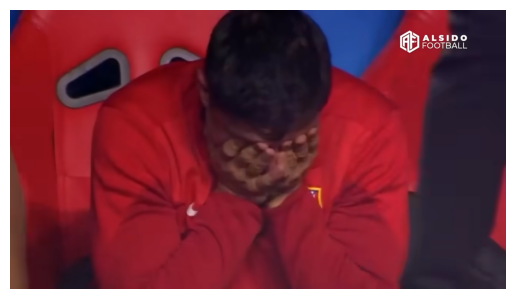

Generated Caption: a man sitting in a red chair with his hands on his face


In [ ]:
  !pip install transformers pillow torch

  from transformers import BlipProcessor, BlipForConditionalGeneration
  from PIL import Image
  import torch
  from google.colab import files
  import matplotlib.pyplot as plt

  # Select device (GPU if available)
  device = "cuda" if torch.cuda.is_available() else "cpu"
  print("Using device:", device)

  # Load pre-trained BLIP model and processor
  processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
  model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

  # Function to generate captions
  def generate_caption(image_path):
      image = Image.open(image_path).convert('RGB')
      inputs = processor(image, return_tensors="pt").to(device)

      outputs = model.generate(
          **inputs,
          max_length=30,
          num_beams=5,
          early_stopping=True
      )
      return processor.decode(outputs[0], skip_special_tokens=True)

  # Upload an image
  uploaded = files.upload()
  for filename in uploaded.keys():
      img_path = filename
      # Show image
      img = Image.open(img_path)
      plt.imshow(img)
      plt.axis("off")
      plt.show()

      # Generate and print caption
      caption = generate_caption(img_path)
      print("Generated Caption:", caption)
